<a href="https://colab.research.google.com/github/RhysWangJunfei/deep_learning/blob/master/linear_svm_gradient_descent_10classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools

In [2]:
'''functions'''
def combinations(lst, n):   
    if n == 0: 
        return [[]]  
    l =[] 
    for i in range(0, len(lst)):      
        m = lst[i] 
        remLst = lst[i + 1:] 
          
        for p in combinations(remLst, n-1): 
            l.append([m]+p)           
    return l 

def scaling(dataX):
    min_value=0
    max_value=255
    scaled_dataX = (dataX-min_value)/(max_value-min_value)
    return scaled_dataX

def cost_function(w,batch_x,batch_y,b,c):
    hyp = np.dot(batch_x,w)+b
    res = 1-hyp
    res[res<0]=0  
    hinge = np.mean(res,axis=0)
    cost = 0.5*np.dot(w.T,w)+c*hinge
    return cost

def get_gradient(w,batch_x,batch_y,b):
    error_w = np.zeros([batch_size,784])
    error_b = np.zeros(batch_y.shape)
    cond = 1-batch_y.reshape([-1,1])*(np.dot(batch_x,w)+b)
    cond = cond.flatten()
    if np.sum(cond<=0)>0:
        error_w[cond<=0,:]=w.T
    if np.sum(cond>0)>0:
        error_w[cond>0,:]=w.T-batch_y[cond>0].reshape([-1,1])*batch_x[cond>0,:]
        error_b[cond>0]=-batch_y[cond>0]
    dw = np.mean(error_w,axis=0)
    db = np.mean(error_b)
    return dw,db

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [3]:
'''Data Preparation'''
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data(path="mnist.npz")

scaled_x_train = scaling(x_train)
scaled_x_test = scaling(x_test)

class_labels = np.arange(0,10)

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
'''Model Training'''
#We can get 10*9/2=45 different combinations
pairs = combinations(class_labels,2)
loss_list = []
model_list = []

for pair in pairs:
    positive = pair[0]
    negative = pair[1]
    data_positive_negative=scaled_x_train[(y_train==positive)|(y_train==negative)].reshape([-1,784])
    label_positive_negative=y_train[(y_train==positive)|(y_train==negative)].astype(int)
    label_positive_negative[label_positive_negative==negative]=-1
    label_positive_negative[label_positive_negative==positive]=1
    w = np.ones([784,1])*0.1
    b=0
    c=0.5
    batch_size = 512
    ids = np.arange(0,label_positive_negative.shape[0])
    alpha=0.01
    iter = 3000
    #svm_loss_list=[]
    for i in range(iter):
        np.random.shuffle(ids)
        batch_ids = ids[0:batch_size]
        batch_x = data_positive_negative[batch_ids,:].reshape([-1,784])
        batch_y = label_positive_negative[batch_ids]
        cost = cost_function(w,batch_x,batch_y,b,c)
        dw,db = get_gradient(w,batch_x,batch_y,b)
        w = w-alpha*(dw.reshape([-1,1]))
        b = b-alpha*db
        print('iteration: '+str(i))
        print('loss is: '+str(cost))
        #svm_loss_list.append(cost.flatten())
    model_dict = {'weight':w, 'bias':b}
    model_list.append(model_dict)

Streaming output truncated to the last 5000 lines.
loss is: [[0.71230276]]
iteration: 501
loss is: [[0.69136124]]
iteration: 502
loss is: [[0.67419395]]
iteration: 503
loss is: [[0.66958762]]
iteration: 504
loss is: [[0.66959965]]
iteration: 505
loss is: [[0.68923045]]
iteration: 506
loss is: [[0.71386194]]
iteration: 507
loss is: [[0.68025072]]
iteration: 508
loss is: [[0.69637707]]
iteration: 509
loss is: [[0.69719315]]
iteration: 510
loss is: [[0.67043534]]
iteration: 511
loss is: [[0.67440798]]
iteration: 512
loss is: [[0.70073105]]
iteration: 513
loss is: [[0.65566869]]
iteration: 514
loss is: [[0.67886424]]
iteration: 515
loss is: [[0.68912439]]
iteration: 516
loss is: [[0.66649729]]
iteration: 517
loss is: [[0.66218761]]
iteration: 518
loss is: [[0.65986161]]
iteration: 519
loss is: [[0.65817643]]
iteration: 520
loss is: [[0.65073202]]
iteration: 521
loss is: [[0.65932238]]
iteration: 522
loss is: [[0.66405646]]
iteration: 523
loss is: [[0.71879074]]
iteration: 524
loss is: [[0.

In [6]:
scaled_x_test = scaled_x_test.reshape([-1,784])
result = np.zeros([scaled_x_test.shape[0],10])
for pair,model in zip(pairs,model_list):
    w = model.get('weight')
    b = model.get('bias')
    test_pred = (np.dot(scaled_x_test,w)+b)
    result[(test_pred<0).flatten(),pair[1]]+=1
    result[(test_pred>0).flatten(),pair[0]]+=1
    
label_result = np.argmax(result,axis=1)
correct_num = np.sum(label_result==y_test)
acc=correct_num/label_result.shape[0]

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(label_result, y_test))

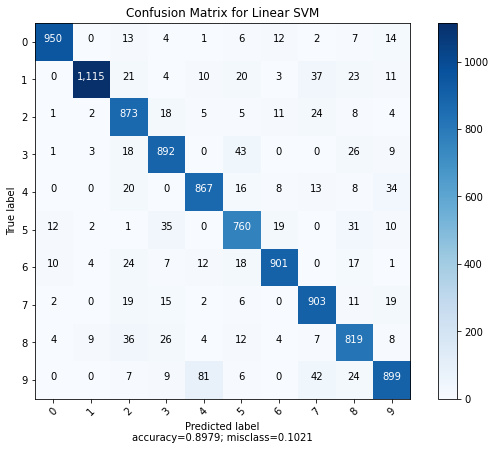

In [9]:
confu = np.array([[950,0,13,4,1,6,12,2,7,14],
[0,1115,21,4,10,20,3,37,23,11],
[1,2,873,18,5,5,11,24,8,4],
[1,3,18,892,0,43,0,0,26,9],
[0,0,20,0,867,16,8,13,8,34],
[12,2,1,35,0,760,19,0,31,10],
[10,4,24,7,12,18,901,0,17,1],
[2,0,19,15,2,6,0,903,11,19],
[4,9,36,26,4,12,4,7,819,8],
[0,0,7,9,81,6,0,42,24,899]])
    
plot_confusion_matrix(cm           = confu, 
                      normalize    = False,
                      target_names = ['0', '1', '2','3','4','5','6','7','8','9'],
                      title        = "Confusion Matrix for Linear SVM")